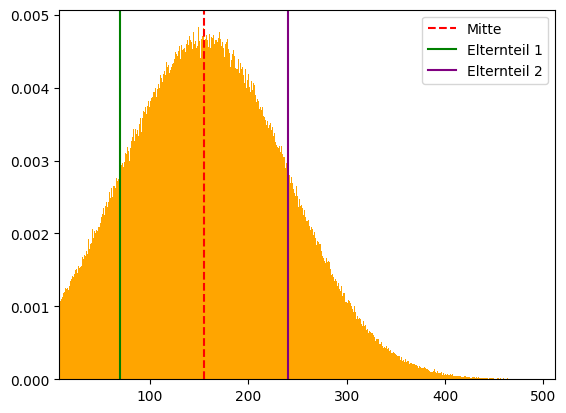

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import median

offspring_1 = 70
offspring_2 = 240

between = offspring_2 - offspring_1

min_x = 8
max_x = 512

variance_factor = 2

expectation = median([offspring_1, offspring_2])
deviation = expectation/max_x

rng = np.random.default_rng()
sample = rng.normal(expectation, between/variance_factor, size=1000000)
plt.hist(sample, 1000, density=True, color='orange')
plt.axvline(x=deviation*max_x, color='red', linestyle='--', label='Mitte')
plt.axvline(x=offspring_1, color='green', linestyle='-', label='Elternteil 1')
plt.axvline(x=offspring_2, color='purple', linestyle='-', label='Elternteil 2')
plt.xlim(min_x, max_x)
plt.legend()
plt.show()

In [5]:
population = []
for gen in range(44):
    file = open('result/current{}.csv'.format(gen), 'r')
    for line in file:
        split = line.split(',')
        id = int(split[0])
        learning_rate = float(split[1])
        batch_size = int(split[2])
        epochs = int(split[3])
        neurons = int(split[4])
        try:
            acc_final = split[5+(0*epochs)+epochs-1]
            val_acc_final = split[5+(1*epochs)+epochs-1]
            loss_final = split[5+(2*epochs)+epochs-1]
            val_loss_final = split[5+(3*epochs)+epochs-1]
            population.append((id, gen, learning_rate, batch_size, epochs, acc_final, val_acc_final, loss_final, val_loss_final))
        except IndexError:
            print("id:" + str(id) + ": " + str(gen) + ":" + str(5+(0*epochs)+epochs-1))


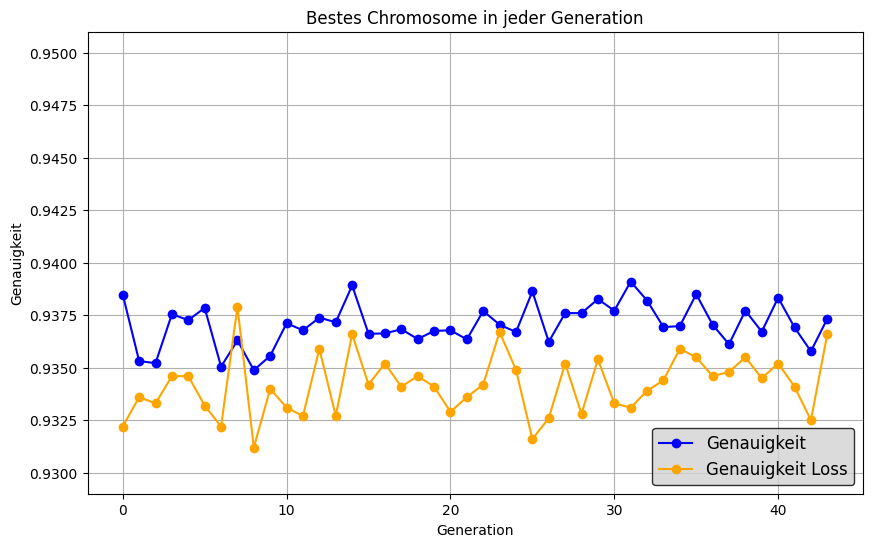

In [6]:
avg_val_acc_per_gen = {}
for i in range(44):
    test = [(id, gen, learning_rate, batch_size, epochs, acc_final, val_acc_final, loss_final, val_loss_final) for (id, gen, learning_rate, batch_size, epochs, acc_final, val_acc_final, loss_final, val_loss_final) in population if gen == i]
    avg = max(test, key=lambda x: x[6])
    avg_val_acc_per_gen[i] = float(avg[6])

lists = sorted(avg_val_acc_per_gen.items())
val_acc_x, val_acc_y = zip(*lists)

max_acc_per_gen = {}
for i in range(44):
    test = [(id, gen, learning_rate, batch_size, epochs, acc_final, val_acc_final, loss_final, val_loss_final) for (id, gen, learning_rate, batch_size, epochs, acc_final, val_acc_final, loss_final, val_loss_final) in population if gen == i]
    avg = max(test, key=lambda x: x[5])
    max_acc_per_gen[i] = float(avg[5])

lists = sorted(max_acc_per_gen.items())
acc_x, acc_y = zip(*lists)

# Erstelle das Diagramm
plt.figure(figsize=(10, 6))
plt.plot(acc_x, acc_y, marker='o', linestyle='-', color='blue', label='Genauigkeit')
plt.plot(val_acc_x, val_acc_y, marker='o', linestyle='-', color='orange', label='Genauigkeit Loss')
plt.xlabel('Generation')
plt.ylim(.929,.951)
plt.legend(loc='lower right', fontsize='large', frameon=True, facecolor='lightgray', edgecolor='black')
plt.ylabel('Genauigkeit')
plt.title('Bestes Chromosome in jeder Generation')
plt.grid(True)
plt.show()

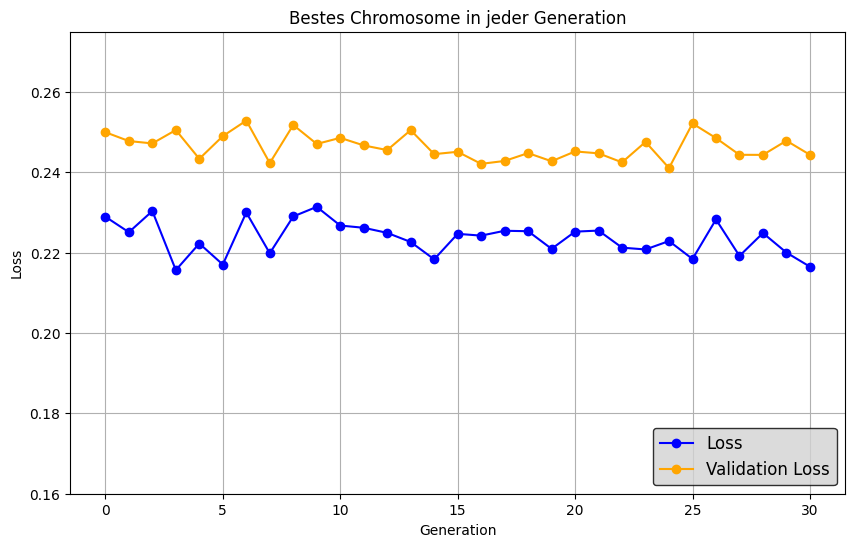

In [7]:
avg_val_acc_per_gen = {}
for i in range(31):
    test = [(id, gen, learning_rate, batch_size, epochs, acc_final, val_acc_final, loss_final, val_loss_final) for (id, gen, learning_rate, batch_size, epochs, acc_final, val_acc_final, loss_final, val_loss_final) in population if gen == i]
    avg = min(test, key=lambda x: x[8])
    avg_val_acc_per_gen[i] = float(avg[8])

lists = sorted(avg_val_acc_per_gen.items())
val_acc_x, val_acc_y = zip(*lists)

max_acc_per_gen = {}
for i in range(31):
    test = [(id, gen, learning_rate, batch_size, epochs, acc_final, val_acc_final, loss_final, val_loss_final) for (id, gen, learning_rate, batch_size, epochs, acc_final, val_acc_final, loss_final, val_loss_final) in population if gen == i]
    avg = min(test, key=lambda x: x[7])
    max_acc_per_gen[i] = float(avg[7])

lists = sorted(max_acc_per_gen.items())
acc_x, acc_y = zip(*lists)

# Erstelle das Diagramm
plt.figure(figsize=(10, 6))
plt.plot(acc_x, acc_y, marker='o', linestyle='-', color='blue', label='Loss')
plt.plot(val_acc_x, val_acc_y, marker='o', linestyle='-', color='orange', label='Validation Loss')
plt.xlabel('Generation')
plt.ylim(.16,.275)
plt.legend(loc='lower right', fontsize='large', frameon=True, facecolor='lightgray', edgecolor='black')
plt.ylabel('Loss')
plt.title('Bestes Chromosome in jeder Generation')
plt.grid(True)
plt.show() 

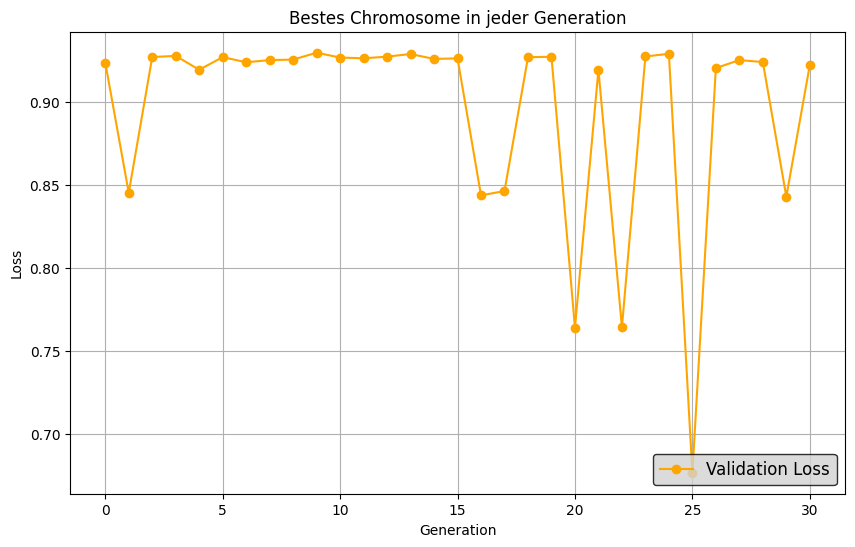

In [137]:
from statistics import fmean

avg_val_acc_per_gen = {}
for i in range(31):
    test = [float(val_acc_final) for (id, gen, learning_rate, batch_size, epochs, acc_final, val_acc_final, loss_final, val_loss_final) in population if gen == i]
    avg_val_acc_per_gen[i] = fmean(test)

lists = sorted(avg_val_acc_per_gen.items())
val_acc_x, val_acc_y = zip(*lists)

# Erstelle das Diagramm
plt.figure(figsize=(10, 6))
plt.plot(val_acc_x, val_acc_y, marker='o', linestyle='-', color='orange', label='Validation Loss')
plt.xlabel('Generation')
plt.legend(loc='lower right', fontsize='large', frameon=True, facecolor='lightgray', edgecolor='black')
plt.ylabel('Loss')
plt.title('Bestes Chromosome in jeder Generation')
plt.grid(True)
plt.show()